### Import libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from scipy import signal
import spm1d
from scipy.signal import find_peaks

### Compute mean and standard deviation clouds for wrist trajectories

With the visualization of the mean and standard clouds we can observe the agreement or discrepancy between the quantitative measurement of Vicon and the Oculus Quest. These plots help researchers understand how well two methods of measurement agree with each other, identify any systematic biases, and assess the magnitude of the variability or random error between the methods.

We will assess a subject at a time, by comparing its performance for an specific position of the headset (frontal, right, or left) for each arm for both movements: elbow and shoulder extension. This way we will compute the average trajectory of a subject during the three series performed during the experiment.

This process consists of seven steps:

**1. Load the data from Excel:** this documents are generated during the MATLAB preprocessing (i.e. s1_s2_RF_wrist_EE = subject 1, serie 2, right arm, frontal view, wrist trajectory, elbow extension). We will upload 12 documents, from which 6 correspond to the left arm and the other 6 correspond to the right arm.For each arm, 3 movements correspond to the elbow extension movement (EE) during series 1 (s1), 2 (s2), and 3 (s3), while the other 3 movements correspond to the shoulder extension movements (F) during series 1 (s1), 2 (s2), and 3 (s3).

**2. Resample:** as we are comparing the performance through different series, each serie took a different amount of time, so we will have to resample our data by adjusting the data from the specific movement of each arm to the "middle time" (neither the maximum nor the minimum lenght of series). 

**3. Generate a new data frame from the resampled data.**

**4. Division in planes:** we generated new tables grouping the data collected for each plane in each of the three series, distinguishing between the Vicon data and the VR data.

**5. Save the new tables as a .csv file.**

**6. Plot a graph with the average trajectory of the wrist captured with VR and Vicon.** This graph include the standard deviation cloud from which we can evaluate the variability of each device. The spread of points around the centerline can provide insights into the variability or random error between the two methods.

**7. Save the figures:** the 12 graphs generated will be saved as a .jpg in the same folder you are working.


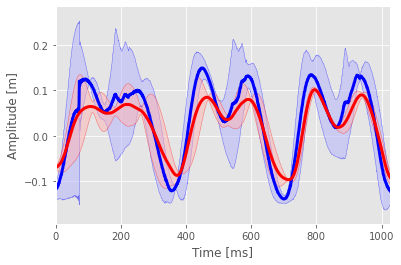

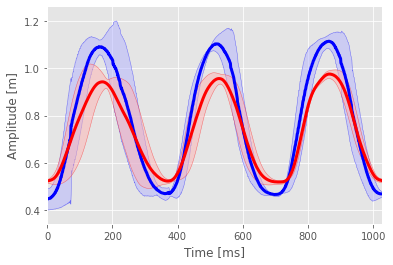

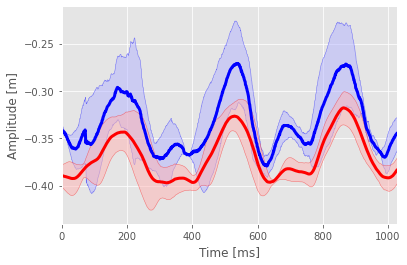

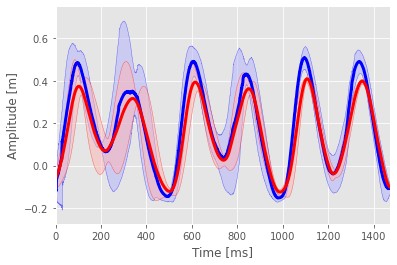

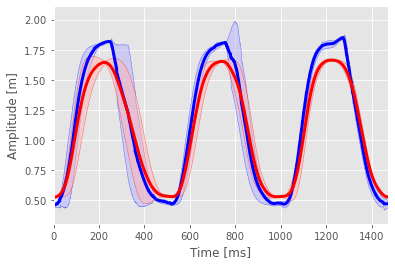

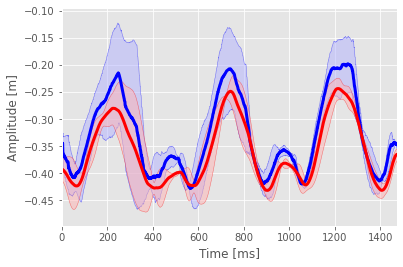

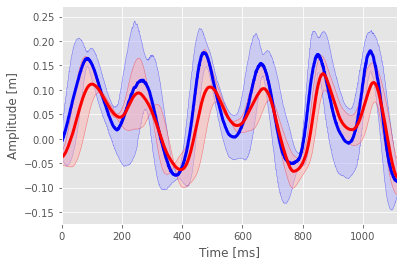

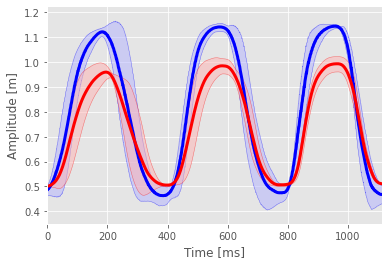

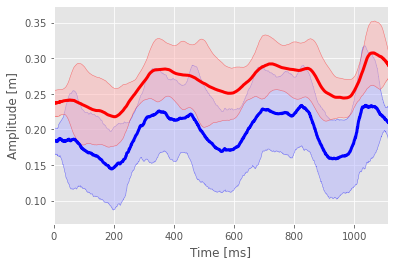

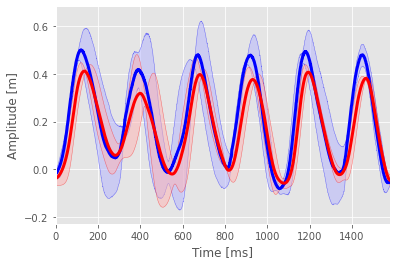

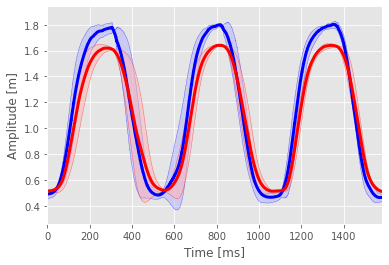

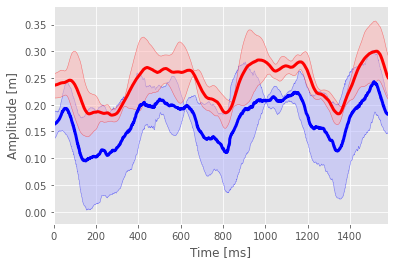

In [94]:
#Load data
#LEFT SIDE
dataset_s1_EE = pd.read_csv('path')
dataset_s1_F = pd.read_csv('path')

dataset_s2_EE = pd.read_csv('path')
dataset_s2_F = pd.read_csv('path')

dataset_s3_EE = pd.read_csv('path')
dataset_s3_F = pd.read_csv('path')

#RIGHT SIDE
R_dataset_s1_EE = pd.read_csv('path')
R_dataset_s1_F = pd.read_csv('path')

R_dataset_s2_EE = pd.read_csv('path')
R_dataset_s2_F = pd.read_csv('path')

R_dataset_s3_EE = pd.read_csv('path')
R_dataset_s3_F = pd.read_csv('path')

#Match the length of the series
lengths_frames = [len(dataset_s1_EE['Frames']), len(dataset_s2_EE['Frames']), len(dataset_s3_EE['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
dataset_s1_EE = signal.resample(dataset_s1_EE, mid_len)
dataset_s2_EE = signal.resample(dataset_s2_EE, mid_len)
dataset_s3_EE = signal.resample(dataset_s3_EE, mid_len)

lengths_frames = [len(dataset_s1_F['Frames']), len(dataset_s2_F['Frames']), len(dataset_s3_F['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
dataset_s1_F = signal.resample(dataset_s1_F, mid_len)
dataset_s2_F = signal.resample(dataset_s2_F, mid_len)
dataset_s3_F = signal.resample(dataset_s3_F, mid_len)

lengths_frames = [len(R_dataset_s1_EE['Frames']), len(R_dataset_s2_EE['Frames']), len(R_dataset_s3_EE['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
R_dataset_s1_EE = signal.resample(R_dataset_s1_EE, mid_len)
R_dataset_s2_EE = signal.resample(R_dataset_s2_EE, mid_len)
R_dataset_s3_EE = signal.resample(R_dataset_s3_EE, mid_len)

lengths_frames = [len(R_dataset_s1_F['Frames']), len(R_dataset_s2_F['Frames']), len(R_dataset_s3_F['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
R_dataset_s1_F = signal.resample(R_dataset_s1_F, mid_len)
R_dataset_s2_F = signal.resample(R_dataset_s2_F, mid_len)
R_dataset_s3_F = signal.resample(R_dataset_s3_F, mid_len)

dataset_s1_EE = pd.DataFrame(dataset_s1_EE, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
dataset_s1_F = pd.DataFrame(dataset_s1_F, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
dataset_s2_EE = pd.DataFrame(dataset_s2_EE, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
dataset_s2_F = pd.DataFrame(dataset_s2_F, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
dataset_s3_EE = pd.DataFrame(dataset_s3_EE, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
dataset_s3_F = pd.DataFrame(dataset_s3_F, columns=['LWJCX', 'LeftControllerPositionZ', 'LWJCZ', 'LeftControllerPositionY', 'LWJCY', 'LeftControllerPositionX', 'Frames'])
    
R_dataset_s1_EE = pd.DataFrame(R_dataset_s1_EE, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
R_dataset_s1_F = pd.DataFrame(R_dataset_s1_F, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
R_dataset_s2_EE = pd.DataFrame(R_dataset_s2_EE, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
R_dataset_s2_F = pd.DataFrame(R_dataset_s2_F, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
R_dataset_s3_EE = pd.DataFrame(R_dataset_s3_EE, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
R_dataset_s3_F = pd.DataFrame(R_dataset_s3_F, columns=['RWJCX', 'RightControllerPositionZ', 'RWJCZ', 'RightControllerPositionY', 'RWJCY', 'RightControllerPositionX', 'Frames'])
                            
#Division in planes
columns_df1 = R_dataset_s1_EE[['RightControllerPositionX']]
columns_df2 = R_dataset_s2_EE[['RightControllerPositionX']]
columns_df3 = R_dataset_s3_EE[['RightControllerPositionX']]
R_dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = R_dataset_s1_EE[['RightControllerPositionY']]
columns_df2 = R_dataset_s2_EE[['RightControllerPositionY']]
columns_df3 = R_dataset_s3_EE[['RightControllerPositionY']]
R_dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = R_dataset_s1_EE[['RightControllerPositionZ']]
columns_df2 = R_dataset_s2_EE[['RightControllerPositionZ']]
columns_df3 = R_dataset_s3_EE[['RightControllerPositionZ']]
columns_df4 = R_dataset_s1_EE[['Frames']]
R_dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = R_dataset_s1_EE[['RWJCY']]
columns_df2 = R_dataset_s2_EE[['RWJCY']]
columns_df3 = R_dataset_s3_EE[['RWJCY']]
R_dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = R_dataset_s1_EE[['RWJCZ']]
columns_df2 = R_dataset_s2_EE[['RWJCZ']]
columns_df3 = R_dataset_s3_EE[['RWJCZ']]
R_dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = R_dataset_s1_EE[['RWJCX']]
columns_df2 = R_dataset_s2_EE[['RWJCX']]
columns_df3 = R_dataset_s3_EE[['RWJCX']]
columns_df4 = R_dataset_s1_EE[['Frames']]
R_dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([R_dataset_VR_EE1, R_dataset_VICON_EE1, R_dataset_VR_EE2, R_dataset_VICON_EE2, R_dataset_VR_EE3, R_dataset_VICON_EE3], axis=1)
result.to_csv('rightWrist_EE.csv', index=False)

columns_df1 = dataset_s1_EE[['LeftControllerPositionX']]
columns_df2 = dataset_s2_EE[['LeftControllerPositionX']]
columns_df3 = dataset_s3_EE[['LeftControllerPositionX']]
dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = dataset_s1_EE[['LeftControllerPositionY']]
columns_df2 = dataset_s2_EE[['LeftControllerPositionY']]
columns_df3 = dataset_s3_EE[['LeftControllerPositionY']]
dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = dataset_s1_EE[['LeftControllerPositionZ']]
columns_df2 = dataset_s2_EE[['LeftControllerPositionZ']]
columns_df3 = dataset_s3_EE[['LeftControllerPositionZ']]
columns_df4 = dataset_s1_EE[['Frames']]
dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = dataset_s1_EE[['LWJCY']]
columns_df2 = dataset_s2_EE[['LWJCY']]
columns_df3 = dataset_s3_EE[['LWJCY']]
dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = dataset_s1_EE[['LWJCZ']]
columns_df2 = dataset_s2_EE[['LWJCZ']]
columns_df3 = dataset_s3_EE[['LWJCZ']]
dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = dataset_s1_EE[['LWJCX']]
columns_df2 = dataset_s2_EE[['LWJCX']]
columns_df3 = dataset_s3_EE[['LWJCX']]
columns_df4 = dataset_s1_EE[['Frames']]
dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([dataset_VR_EE1, dataset_VICON_EE1, dataset_VR_EE2, dataset_VICON_EE2, dataset_VR_EE3, dataset_VICON_EE3], axis=1)
result.to_csv('leftWrist_EE.csv', index=False)

columns_df1 = R_dataset_s1_F[['RightControllerPositionX']]
columns_df2 = R_dataset_s2_F[['RightControllerPositionX']]
columns_df3 = R_dataset_s3_F[['RightControllerPositionX']]
R_dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = R_dataset_s1_F[['RightControllerPositionY']]
columns_df2 = R_dataset_s2_F[['RightControllerPositionY']]
columns_df3 = R_dataset_s3_F[['RightControllerPositionY']]
R_dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = R_dataset_s1_F[['RightControllerPositionZ']]
columns_df2 = R_dataset_s2_F[['RightControllerPositionZ']]
columns_df3 = R_dataset_s3_F[['RightControllerPositionZ']]
columns_df4 = R_dataset_s1_F[['Frames']]
R_dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = R_dataset_s1_F[['RWJCY']]
columns_df2 = R_dataset_s2_F[['RWJCY']]
columns_df3 = R_dataset_s3_F[['RWJCY']]
R_dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = R_dataset_s1_F[['RWJCZ']]
columns_df2 = R_dataset_s2_F[['RWJCZ']]
columns_df3 = R_dataset_s3_F[['RWJCZ']]
R_dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = R_dataset_s1_F[['RWJCX']]
columns_df2 = R_dataset_s2_F[['RWJCX']]
columns_df3 = R_dataset_s3_F[['RWJCX']]
columns_df4 = R_dataset_s1_F[['Frames']]
R_dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([R_dataset_VR_F1, R_dataset_VICON_F1, R_dataset_VR_F2, R_dataset_VICON_F2, R_dataset_VR_F3, R_dataset_VICON_F3], axis=1)
result.to_csv('rightWrist_F.csv', index=False)

columns_df1 = dataset_s1_F[['LeftControllerPositionX']]
columns_df2 = dataset_s2_F[['LeftControllerPositionX']]
columns_df3 = dataset_s3_F[['LeftControllerPositionX']]
dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = dataset_s1_F[['LeftControllerPositionY']]
columns_df2 = dataset_s2_F[['LeftControllerPositionY']]
columns_df3 = dataset_s3_F[['LeftControllerPositionY']]
dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = dataset_s1_F[['LeftControllerPositionZ']]
columns_df2 = dataset_s2_F[['LeftControllerPositionZ']]
columns_df3 = dataset_s3_F[['LeftControllerPositionZ']]
columns_df4 = dataset_s1_F[['Frames']]
dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = dataset_s1_F[['LWJCY']]
columns_df2 = dataset_s2_F[['LWJCY']]
columns_df3 = dataset_s3_F[['LWJCY']]
dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = dataset_s1_F[['LWJCZ']]
columns_df2 = dataset_s2_F[['LWJCZ']]
columns_df3 = dataset_s3_F[['LWJCZ']]
dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = dataset_s1_F[['LWJCX']]
columns_df2 = dataset_s2_F[['LWJCX']]
columns_df3 = dataset_s3_F[['LWJCX']]
columns_df4 = dataset_s1_F[['Frames']]
dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([dataset_VR_EE1, dataset_VICON_EE1, dataset_VR_EE2, dataset_VICON_EE2, dataset_VR_EE3, dataset_VICON_EE3], axis=1)
result.to_csv('leftWrist_F.csv', index=False)

#Plot mean and standard deviation clouds
#1-SAGITTAL, 2-TRANSVERSE, 3-FRONTAL
dataset_VR_F3 = dataset_VR_F3.drop('Frames', axis=1)
dataset_VICON_F3 = dataset_VICON_F3.drop('Frames', axis=1)
dataset_VR_EE3 = dataset_VR_EE3.drop('Frames', axis=1)
dataset_VICON_EE3 = dataset_VICON_EE3.drop('Frames', axis=1)
R_dataset_VR_F3 = R_dataset_VR_F3.drop('Frames', axis=1)
R_dataset_VICON_F3 = R_dataset_VICON_F3.drop('Frames', axis=1)
R_dataset_VR_EE3 = R_dataset_VR_EE3.drop('Frames', axis=1)
R_dataset_VICON_EE3 = R_dataset_VICON_EE3.drop('Frames', axis=1)

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_EE1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_EE1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrRS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_EE2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_EE2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrRT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_EE3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_EE3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrRF_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_F1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_F1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrRS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_F2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_F2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrRT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_F3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_F3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrRF_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_EE1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_EE1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrLS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_EE2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_EE2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrLT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_EE3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_EE3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrLF_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrLS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrLT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrLF_meansd.jpg')
plt.show()

### Compute mean and standard deviation clouds for elbow trajectories

Follow the same steps as the wrist trajectories but loading the wlbow trajectory data.

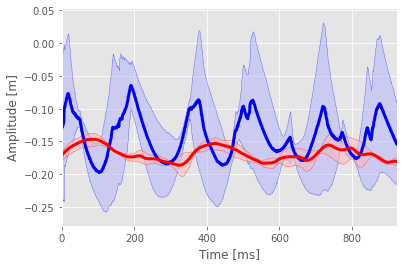

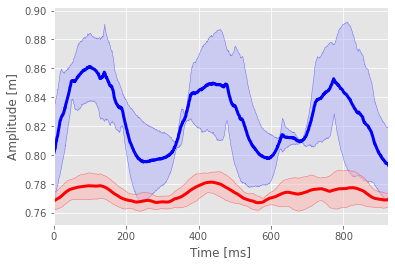

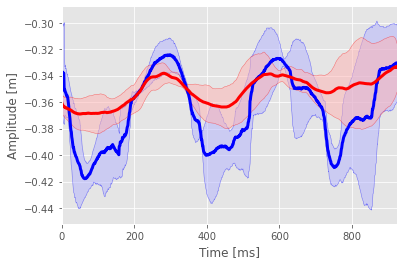

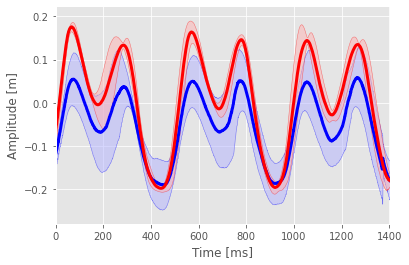

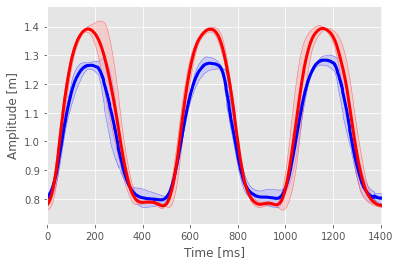

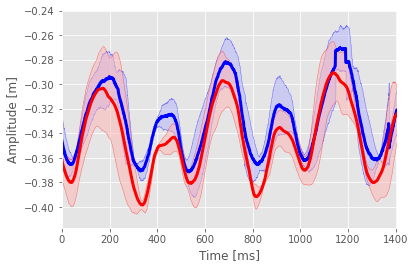

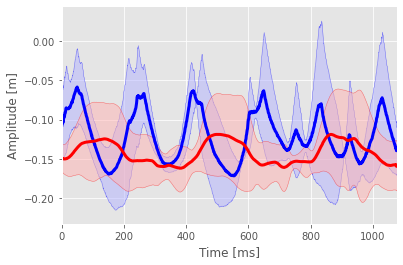

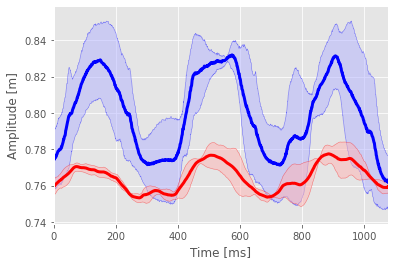

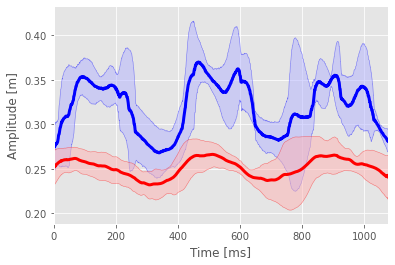

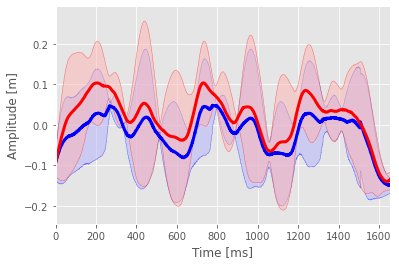

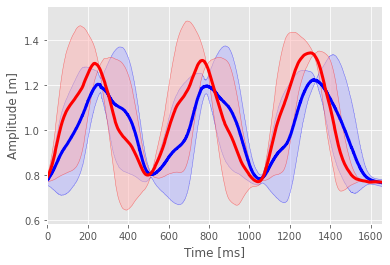

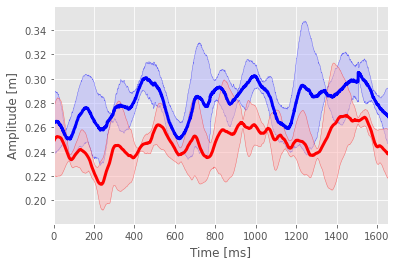

In [119]:
#Load data
#LEFT SIDE
dataset_s1_EE = pd.read_csv('path')
dataset_s1_F = pd.read_csv('path')

dataset_s2_EE = pd.read_csv('path')
dataset_s2_F = pd.read_csv('path')

dataset_s3_EE = pd.read_csv('path')
dataset_s3_F = pd.read_csv('path')

#RIGHT SIDE
R_dataset_s1_EE = pd.read_csv('path')
R_dataset_s1_F = pd.read_csv('path')

R_dataset_s2_EE = pd.read_csv('path')
R_dataset_s2_F = pd.read_csv('path')

R_dataset_s3_EE = pd.read_csv('path')
R_dataset_s3_F = pd.read_csv('path')

#Match the length of the series
lengths_frames = [len(dataset_s1_EE['Frames']), len(dataset_s2_EE['Frames']), len(dataset_s3_EE['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
dataset_s1_EE = signal.resample(dataset_s1_EE, mid_len)
dataset_s2_EE = signal.resample(dataset_s2_EE, mid_len)
dataset_s3_EE = signal.resample(dataset_s3_EE, mid_len)

lengths_frames = [len(dataset_s1_F['Frames']), len(dataset_s2_F['Frames']), len(dataset_s3_F['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
dataset_s1_F = signal.resample(dataset_s1_F, mid_len)
dataset_s2_F = signal.resample(dataset_s2_F, mid_len)
dataset_s3_F = signal.resample(dataset_s3_F, mid_len)

lengths_frames = [len(R_dataset_s1_EE['Frames']), len(R_dataset_s2_EE['Frames']), len(R_dataset_s3_EE['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
R_dataset_s1_EE = signal.resample(R_dataset_s1_EE, mid_len)
R_dataset_s2_EE = signal.resample(R_dataset_s2_EE, mid_len)
R_dataset_s3_EE = signal.resample(R_dataset_s3_EE, mid_len)

lengths_frames = [len(R_dataset_s1_F['Frames']), len(R_dataset_s2_F['Frames']), len(R_dataset_s3_F['Frames'])]
ordered_lengths_frames = sorted(lengths_frames)
mid_len = ordered_lengths_frames[1]
R_dataset_s1_F = signal.resample(R_dataset_s1_F, mid_len)
R_dataset_s2_F = signal.resample(R_dataset_s2_F, mid_len)
R_dataset_s3_F = signal.resample(R_dataset_s3_F, mid_len)

#Generate data frames
dataset_s1_EE = pd.DataFrame(dataset_s1_EE, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
dataset_s1_F = pd.DataFrame(dataset_s1_F, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
dataset_s2_EE = pd.DataFrame(dataset_s2_EE, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
dataset_s2_F = pd.DataFrame(dataset_s2_F, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
dataset_s3_EE = pd.DataFrame(dataset_s3_EE, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])
dataset_s3_F = pd.DataFrame(dataset_s3_F, columns=['LELBX', 'LeftElbowGlobalPositionZ', 'LELBZ', 'LeftElbowGlobalPositionY', 'LELBY', 'LeftElbowGlobalPositionX', 'Frames'])

R_dataset_s1_EE = pd.DataFrame(R_dataset_s1_EE, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
R_dataset_s1_F = pd.DataFrame(R_dataset_s1_F, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
R_dataset_s2_EE = pd.DataFrame(R_dataset_s2_EE, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
R_dataset_s2_F = pd.DataFrame(R_dataset_s2_F, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
R_dataset_s3_EE = pd.DataFrame(R_dataset_s3_EE, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])
R_dataset_s3_F = pd.DataFrame(R_dataset_s3_F, columns=['RELBX', 'RightElbowGlobalPositionZ', 'RELBZ', 'RightElbowGlobalPositionY', 'RELBY', 'RightElbowGlobalPositionX', 'Frames'])                 

#Division in planes
columns_df1 = R_dataset_s1_EE[['RightElbowGlobalPositionX']]
columns_df2 = R_dataset_s2_EE[['RightElbowGlobalPositionX']]
columns_df3 = R_dataset_s3_EE[['RightElbowGlobalPositionX']]
R_dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = R_dataset_s1_EE[['RightElbowGlobalPositionY']]
columns_df2 = R_dataset_s2_EE[['RightElbowGlobalPositionY']]
columns_df3 = R_dataset_s3_EE[['RightElbowGlobalPositionY']]
R_dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = R_dataset_s1_EE[['RightElbowGlobalPositionZ']]
columns_df2 = R_dataset_s2_EE[['RightElbowGlobalPositionZ']]
columns_df3 = R_dataset_s3_EE[['RightElbowGlobalPositionZ']]
columns_df4 = R_dataset_s1_EE[['Frames']]
R_dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = R_dataset_s1_EE[['RELBY']]
columns_df2 = R_dataset_s2_EE[['RELBY']]
columns_df3 = R_dataset_s3_EE[['RELBY']]
R_dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = R_dataset_s1_EE[['RELBZ']]
columns_df2 = R_dataset_s2_EE[['RELBZ']]
columns_df3 = R_dataset_s3_EE[['RELBZ']]
R_dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = R_dataset_s1_EE[['RELBX']]
columns_df2 = R_dataset_s2_EE[['RELBX']]
columns_df3 = R_dataset_s3_EE[['RELBX']]
columns_df4 = R_dataset_s1_EE[['Frames']]
R_dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([R_dataset_VR_EE1, R_dataset_VICON_EE1, R_dataset_VR_EE2, R_dataset_VICON_EE2, R_dataset_VR_EE3, R_dataset_VICON_EE3], axis=1)
result.to_csv('rightWrist_EE.csv', index=False)

columns_df1 = dataset_s1_EE[['LeftElbowGlobalPositionX']]
columns_df2 = dataset_s2_EE[['LeftElbowGlobalPositionX']]
columns_df3 = dataset_s3_EE[['LeftElbowGlobalPositionX']]
dataset_VR_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_EE1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = dataset_s1_EE[['LeftElbowGlobalPositionY']]
columns_df2 = dataset_s2_EE[['LeftElbowGlobalPositionY']]
columns_df3 = dataset_s3_EE[['LeftElbowGlobalPositionY']]
dataset_VR_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_EE2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = dataset_s1_EE[['LeftElbowGlobalPositionZ']]
columns_df2 = dataset_s2_EE[['LeftElbowGlobalPositionZ']]
columns_df3 = dataset_s3_EE[['LeftElbowGlobalPositionZ']]
columns_df4 = dataset_s1_EE[['Frames']]
dataset_VR_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VR_EE3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = dataset_s1_EE[['LELBY']]
columns_df2 = dataset_s2_EE[['LELBY']]
columns_df3 = dataset_s3_EE[['LELBY']]
dataset_VICON_EE1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_EE1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = dataset_s1_EE[['LELBZ']]
columns_df2 = dataset_s2_EE[['LELBZ']]
columns_df3 = dataset_s3_EE[['LELBZ']]
dataset_VICON_EE2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_EE2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = dataset_s1_EE[['LELBX']]
columns_df2 = dataset_s2_EE[['LELBX']]
columns_df3 = dataset_s3_EE[['LELBX']]
columns_df4 = dataset_s1_EE[['Frames']]
dataset_VICON_EE3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VICON_EE3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([dataset_VR_EE1, dataset_VICON_EE1, dataset_VR_EE2, dataset_VICON_EE2, dataset_VR_EE3, dataset_VICON_EE3], axis=1)
result.to_csv('leftElbow_EE.csv', index=False)

columns_df1 = R_dataset_s1_F[['RightElbowGlobalPositionX']]
columns_df2 = R_dataset_s2_F[['RightElbowGlobalPositionX']]
columns_df3 = R_dataset_s3_F[['RightElbowGlobalPositionX']]
R_dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = R_dataset_s1_F[['RightElbowGlobalPositionY']]
columns_df2 = R_dataset_s2_F[['RightElbowGlobalPositionY']]
columns_df3 = R_dataset_s3_F[['RightElbowGlobalPositionY']]
R_dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = R_dataset_s1_F[['RightElbowGlobalPositionZ']]
columns_df2 = R_dataset_s2_F[['RightElbowGlobalPositionZ']]
columns_df3 = R_dataset_s3_F[['RightElbowGlobalPositionZ']]
columns_df4 = R_dataset_s1_F[['Frames']]
R_dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = R_dataset_s1_F[['RELBY']]
columns_df2 = R_dataset_s2_F[['RELBY']]
columns_df3 = R_dataset_s3_F[['RELBY']]
R_dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = R_dataset_s1_F[['RELBZ']]
columns_df2 = R_dataset_s2_F[['RELBZ']]
columns_df3 = R_dataset_s3_F[['RELBZ']]
R_dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
R_dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = R_dataset_s1_F[['RELBX']]
columns_df2 = R_dataset_s2_F[['RELBX']]
columns_df3 = R_dataset_s3_F[['RELBX']]
columns_df4 = R_dataset_s1_F[['Frames']]
R_dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
R_dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([R_dataset_VR_F1, R_dataset_VICON_F1, R_dataset_VR_F2, R_dataset_VICON_F2, R_dataset_VR_F3, R_dataset_VICON_F3], axis=1)
result.to_csv('rightElbow_F.csv', index=False)

columns_df1 = dataset_s1_F[['LeftElbowGlobalPositionX']]
columns_df2 = dataset_s2_F[['LeftElbowGlobalPositionX']]
columns_df3 = dataset_s3_F[['LeftElbowGlobalPositionX']]
dataset_VR_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_F1.columns = ['VR_Serie1_sagittal', 'VR_Serie2_sagittal', 'VR_Serie3_sagittal']
columns_df1 = dataset_s1_F[['LeftElbowGlobalPositionY']]
columns_df2 = dataset_s2_F[['LeftElbowGlobalPositionY']]
columns_df3 = dataset_s3_F[['LeftElbowGlobalPositionY']]
dataset_VR_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VR_F2.columns = ['VR_Serie1_transverse', 'VR_Serie2_transverse', 'VR_Serie3_transverse']
columns_df1 = dataset_s1_F[['LeftElbowGlobalPositionZ']]
columns_df2 = dataset_s2_F[['LeftElbowGlobalPositionZ']]
columns_df3 = dataset_s3_F[['LeftElbowGlobalPositionZ']]
columns_df4 = dataset_s1_F[['Frames']]
dataset_VR_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VR_F3.columns = ['VR_Serie1_frontal', 'VR_Serie2_frontal', 'VR_Serie3_frontal', 'Frames']
columns_df1 = dataset_s1_F[['LELBY']]
columns_df2 = dataset_s2_F[['LELBY']]
columns_df3 = dataset_s3_F[['LELBY']]
dataset_VICON_F1 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_F1.columns = ['VICON_Serie1_sagittal', 'VICON_Serie2_sagittal', 'VICON_Serie3_sagittal']
columns_df1 = dataset_s1_F[['LELBZ']]
columns_df2 = dataset_s2_F[['LELBZ']]
columns_df3 = dataset_s1_F[['LELBZ']]
columns_df4 = dataset_s1_F[['Frames']]
dataset_VICON_F2 = pd.concat([columns_df1, columns_df2, columns_df3], axis=1)
dataset_VICON_F2.columns = ['VICON_Serie1_transverse', 'VICON_Serie2_transverse', 'VICON_Serie3_transverse']
columns_df1 = dataset_s1_F[['LELBX']]
columns_df2 = dataset_s2_F[['LELBX']]
columns_df3 = dataset_s3_F[['LELBX']]
columns_df4 = dataset_s1_F[['Frames']]
dataset_VICON_F3 = pd.concat([columns_df1, columns_df2, columns_df3, columns_df4], axis=1)
dataset_VICON_F3.columns = ['VICON_Serie1_frontal', 'VICON_Serie2_frontal', 'VICON_Serie3_frontal', 'Frames']
result = pd.concat([dataset_VR_F1, dataset_VICON_F1, dataset_VR_F2, dataset_VICON_F2, dataset_VR_F3, dataset_VICON_F3], axis=1)
result.to_csv('leftElbow_F.csv', index=False)

#Plot mean and standard deviation clouds
#1-SAGITTAL, 2-TRANSVERSE, 3-FRONTAL
dataset_VR_F3 = dataset_VR_F3.drop('Frames', axis=1)
dataset_VICON_F3 = dataset_VICON_F3.drop('Frames', axis=1)
dataset_VR_EE3 = dataset_VR_EE3.drop('Frames', axis=1)
dataset_VICON_EE3 = dataset_VICON_EE3.drop('Frames', axis=1)
R_dataset_VR_F3 = R_dataset_VR_F3.drop('Frames', axis=1)
R_dataset_VICON_F3 = R_dataset_VICON_F3.drop('Frames', axis=1)
R_dataset_VR_EE3 = R_dataset_VR_EE3.drop('Frames', axis=1)
R_dataset_VICON_EE3 = R_dataset_VICON_EE3.drop('Frames', axis=1)

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_EE1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_EE1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrRS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_EE2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_EE2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrRT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_EE3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_EE3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrRF_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_F1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_F1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrRS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_F2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_F2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrRT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VR_F3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(R_dataset_VICON_F3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrRF_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_EE1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_EE1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrLS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_EE2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_EE2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrLT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_EE3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_EE3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Elbow_vrLF_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F1), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F1), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrLS_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F2), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F2), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrLT_meansd.jpg')
plt.show()

plt.figure
spm1d.plot.plot_mean_sd(np.transpose(dataset_VR_F3), linecolor='b', facecolor=(0.7,0.7,1), edgecolor='b', label='VR')
spm1d.plot.plot_mean_sd(np.transpose(dataset_VICON_F3), linecolor='r', facecolor=(1,0.7,0.7), edgecolor='r', label='VICON')
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude [m]')
plt.savefig('Shoulder_vrLF_meansd.jpg')
plt.show()

### Statistical tests

We apply normalization to our data in order to facilitate the interpretability and the visual comparisons between tbe performance of each device.

We plot graphs including the boxplot and violin distributions for each serie of an specific movement for each device. These boxplots help us visualize the distribution, central tendency, and spread of a dataset. They provide a concise summary of the data's characteristics and are particularly useful for identifying potential outliers, comparing distributions, and understanding the variability between the Vicon and VR data.

When testing the statistical test that was going to be used (parametric or non-parametric), several transformations were applied to the data in order to check if the data followed a notmal distribution (which it did not). Also graphical methods, such as histograms or quantile-quantile graphs were employed; in addition to using analytical methods, such as the D'Agostino's K-squared test. This section of the code may not be necessary to be runned again, therefore it is commented.

Finally, a non-parametric t-test is applied to the vicon and vr data using the spm1d package, which allows us to make statistical inferences regarding registered kinematic time series. This graphical representation allows us to identify in which sections there is enough similarity (or not) between the Vicon and the VR data.

In [ ]:
#Normalization
scaler = MinMaxScaler()
dataset_VR_F1 = pd.DataFrame(scaler.fit_transform(dataset_VR_F1), columns=dataset_VR_F1.columns)
dataset_VICON_F1 = pd.DataFrame(scaler.fit_transform(dataset_VICON_F1), columns=dataset_VICON_F1.columns)
dataset_VR_EE1 = pd.DataFrame(scaler.fit_transform(dataset_VR_EE1), columns=dataset_VR_EE1.columns)
dataset_VICON_EE1 = pd.DataFrame(scaler.fit_transform(dataset_VICON_EE1), columns=dataset_VICON_EE1.columns)
R_dataset_VR_F1 = pd.DataFrame(scaler.fit_transform(R_dataset_VR_F1), columns=R_dataset_VR_F1.columns)
R_dataset_VICON_F1 = pd.DataFrame(scaler.fit_transform(R_dataset_VICON_F1), columns=R_dataset_VICON_F1.columns)
R_dataset_VR_EE1 = pd.DataFrame(scaler.fit_transform(R_dataset_VR_EE1), columns=R_dataset_VR_EE1.columns)
R_dataset_VICON_EE1 = pd.DataFrame(scaler.fit_transform(R_dataset_VICON_EE1), columns=R_dataset_VICON_EE1.columns)

dataset_VR_F2 = pd.DataFrame(scaler.fit_transform(dataset_VR_F2), columns=dataset_VR_F2.columns)
dataset_VICON_F2 = pd.DataFrame(scaler.fit_transform(dataset_VICON_F2), columns=dataset_VICON_F2.columns)
dataset_VR_EE2 = pd.DataFrame(scaler.fit_transform(dataset_VR_EE2), columns=dataset_VR_EE2.columns)
dataset_VICON_EE2 = pd.DataFrame(scaler.fit_transform(dataset_VICON_EE2), columns=dataset_VICON_EE2.columns)
R_dataset_VR_F2 = pd.DataFrame(scaler.fit_transform(R_dataset_VR_F2), columns=R_dataset_VR_F2.columns)
R_dataset_VICON_F2 = pd.DataFrame(scaler.fit_transform(R_dataset_VICON_F2), columns=R_dataset_VICON_F2.columns)
R_dataset_VR_EE2 = pd.DataFrame(scaler.fit_transform(R_dataset_VR_EE2), columns=R_dataset_VR_EE2.columns)
R_dataset_VICON_EE2 = pd.DataFrame(scaler.fit_transform(R_dataset_VICON_EE2), columns=R_dataset_VICON_EE2.columns)

dataset_VR_F3 = pd.DataFrame(scaler.fit_transform(dataset_VR_F3), columns=dataset_VR_F3.columns)
dataset_VICON_F3 = pd.DataFrame(scaler.fit_transform(dataset_VICON_F3), columns=dataset_VICON_F3.columns)
dataset_VR_EE3 = pd.DataFrame(scaler.fit_transform(dataset_VR_EE3), columns=dataset_VR_EE3.columns)
dataset_VICON_EE3 = pd.DataFrame(scaler.fit_transform(dataset_VICON_EE3), columns=dataset_VICON_EE3.columns)
R_dataset_VR_F3 = pd.DataFrame(scaler.fit_transform(R_dataset_VR_F3), columns=R_dataset_VR_F3.columns)
R_dataset_VICON_F3 = pd.DataFrame(scaler.fit_transform(R_dataset_VICON_F3), columns=R_dataset_VICON_F3.columns)
R_dataset_VR_EE3 = pd.DataFrame(scaler.fit_transform(R_dataset_VR_EE3), columns=R_dataset_VR_EE3.columns)
R_dataset_VICON_EE3 = pd.DataFrame(scaler.fit_transform(R_dataset_VICON_EE3), columns=R_dataset_VICON_EE3.columns)

#Generate boxplots   
boxplot_data_EE_S = [dataset_VICON_EE1['VICON_Serie1_sagittal'],  dataset_VR_EE1['VR_Serie1_sagittal'], dataset_VICON_EE1['VICON_Serie2_sagittal'], dataset_VR_EE1['VR_Serie2_sagittal'], dataset_VICON_EE1['VICON_Serie3_sagittal'], dataset_VR_EE1['VR_Serie3_sagittal']]
boxplot_data_EE_T = [dataset_VICON_EE2['VICON_Serie1_transverse'],  dataset_VR_EE2['VR_Serie1_transverse'], dataset_VICON_EE2['VICON_Serie2_transverse'], dataset_VR_EE2['VR_Serie2_transverse'], dataset_VICON_EE2['VICON_Serie3_transverse'], dataset_VR_EE2['VR_Serie3_transverse']]
boxplot_data_EE_F = [dataset_VICON_EE3['VICON_Serie1_frontal'],  dataset_VR_EE3['VR_Serie1_frontal'], dataset_VICON_EE3['VICON_Serie2_frontal'], dataset_VR_EE3['VR_Serie2_frontal'], dataset_VICON_EE3['VICON_Serie3_frontal'], dataset_VR_EE3['VR_Serie3_frontal']]
boxplot_data_F_S = [dataset_VICON_F1['VICON_Serie1_sagittal'],  dataset_VR_F1['VR_Serie1_sagittal'], dataset_VICON_F1['VICON_Serie2_sagittal'], dataset_VR_F1['VR_Serie2_sagittal'], dataset_VICON_F1['VICON_Serie3_sagittal'], dataset_VR_F1['VR_Serie3_sagittal']]
boxplot_data_F_T = [dataset_VICON_F2['VICON_Serie1_transverse'],  dataset_VR_F2['VR_Serie1_transverse'], dataset_VICON_F2['VICON_Serie2_transverse'], dataset_VR_F2['VR_Serie2_transverse'], dataset_VICON_F2['VICON_Serie3_transverse'], dataset_VR_F2['VR_Serie3_transverse']]
boxplot_data_F_F = [dataset_VICON_F3['VICON_Serie1_frontal'],  dataset_VR_F3['VR_Serie1_frontal'], dataset_VICON_F3['VICON_Serie2_frontal'],  dataset_VR_F3['VR_Serie2_frontal'], dataset_VICON_F3['VICON_Serie3_frontal'], dataset_VR_F3['VR_Serie3_frontal']]
R_boxplot_data_EE_S = [R_dataset_VICON_EE1['VICON_Serie1_sagittal'], R_dataset_VR_EE1['VR_Serie1_sagittal'], R_dataset_VICON_EE1['VICON_Serie2_sagittal'], R_dataset_VR_EE1['VR_Serie2_sagittal'], R_dataset_VICON_EE1['VICON_Serie3_sagittal'], R_dataset_VR_EE1['VR_Serie3_sagittal']]
R_boxplot_data_EE_T = [R_dataset_VICON_EE2['VICON_Serie1_transverse'], R_dataset_VR_EE2['VR_Serie1_transverse'], R_dataset_VICON_EE2['VICON_Serie2_transverse'], R_dataset_VR_EE2['VR_Serie2_transverse'], R_dataset_VICON_EE2['VICON_Serie3_transverse'], R_dataset_VR_EE2['VR_Serie3_transverse']]
R_boxplot_data_EE_F = [R_dataset_VICON_EE3['VICON_Serie1_frontal'], R_dataset_VR_EE3['VR_Serie1_frontal'], R_dataset_VICON_EE3['VICON_Serie2_frontal'], R_dataset_VR_EE3['VR_Serie2_frontal'], R_dataset_VICON_EE3['VICON_Serie3_frontal'], R_dataset_VR_EE3['VR_Serie3_frontal']]
R_boxplot_data_F_S = [R_dataset_VICON_F1['VICON_Serie1_sagittal'], R_dataset_VR_F1['VR_Serie1_sagittal'], R_dataset_VICON_F1['VICON_Serie2_sagittal'], R_dataset_VR_F1['VR_Serie2_sagittal'], R_dataset_VICON_F1['VICON_Serie3_sagittal'], R_dataset_VR_F1['VR_Serie3_sagittal']]
R_boxplot_data_F_T = [R_dataset_VICON_F2['VICON_Serie1_transverse'], R_dataset_VR_F2['VR_Serie1_transverse'], R_dataset_VICON_F2['VICON_Serie2_transverse'], R_dataset_VR_F2['VR_Serie2_transverse'], R_dataset_VICON_F2['VICON_Serie3_transverse'], R_dataset_VR_F2['VR_Serie3_transverse']]
R_boxplot_data_F_F = [R_dataset_VICON_F3['VICON_Serie1_frontal'], R_dataset_VR_F3['VR_Serie1_frontal'], R_dataset_VICON_F3['VICON_Serie2_frontal'], R_dataset_VR_F3['VR_Serie2_frontal'], R_dataset_VICON_F3['VICON_Serie3_frontal'], R_dataset_VR_F3['VR_Serie3_frontal']]

boxplot_data = [boxplot_data_EE_S, boxplot_data_EE_T, boxplot_data_EE_F, boxplot_data_F_S, boxplot_data_F_T, boxplot_data_F_F, R_boxplot_data_EE_S, R_boxplot_data_EE_T, R_boxplot_data_EE_F, R_boxplot_data_F_S, R_boxplot_data_F_T, R_boxplot_data_F_F]
titles = ['Left side, Elbow extension, Sagittal Plane', 'Left side, Elbow extension, Transverse Plane', 'Left side, Elbow extension, Frontal Plane', 'Left side, Shoulder extension, Sagittal Plane', 'Left side, Shoulder extension, Transverse Plane', 'Left side, Shoulder extension, Frontal Plane','Right side, Elbow extension, Sagittal Plane', 'Right side, Elbow extension, Transverse Plane', 'Right side, Elbow extension, Frontal Plane', 'Right side, Shoulder extension, Sagittal Plane', 'Right side, Shoulder extension, Transverse Plane', 'Right side, Shoulder extension, Frontal Plane']
boxplot_jpg = ['L_boxplot_EE_S.jpg', 'L_boxplot_EE_T.jpg', 'L_boxplot_EE_F.jpg', 'L_boxplot_F_S.jpg', 'L_boxplot_F_T.jpg', 'L_boxplot_F_F.jpg', 'R_boxplot_EE_S.jpg', 'R_boxplot_EE_T.jpg', 'R_boxplot_EE_F.jpg', 'R_boxplot_F_S.jpg', 'R_boxplot_F_T.jpg', 'R_boxplot_F_F.jpg']
violinplot_jpg = ['L_violinplot_EE_S.jpg', 'L_violinplot_EE_T.jpg', 'L_violinplot_EE_F.jpg', 'L_violinplot_F_S.jpg', 'L_violinplot_F_T.jpg', 'L_violinplot_F_F.jpg', 'R_violinplot_EE_S.jpg', 'R_violinplot_EE_T.jpg', 'R_violinplot_EE_F.jpg', 'R_violinplot_F_S.jpg', 'R_violinplot_F_T.jpg', 'R_violinplot_F_F.jpg']

for i, title, path in zip(boxplot_data, titles, boxplot_jpg):
    fig, ax = plt.subplots()
    ax.set_title(f'Boxplot for {title}')
    ax.boxplot(i)
    ax.set_xticklabels(['VICON_S1', 'VR_S1', 'VICON_S2', 'VR_S2', 'VICON_S3', 'VR_S3'])
    ax.set_ylabel('Value')
    plt.savefig(path)
    plt.show()

for i, title, path in zip(boxplot_data, titles, violinplot_jpg):
    fig, ax = plt.subplots()
    ax.set_title(f'Violin plot for {title}')
    ax.violinplot(i, showmedians = True)
    ax.set_xticklabels(['VICON_S1', 'VR_S1', 'VICON_S2', 'VR_S2', 'VICON_S3', 'VR_S3'])
    ax.set_ylabel('Value')
    plt.savefig(path)
    plt.show()

#Transformations: these transformtions were applied to the Vicon and VR data in order to test if they followed a normal distribution
"""# Apply squared transformation
#data = data.apply(lambda x: x ** 0.5)
# Apply logarithmic transformation
#data = np.log1p(data)
#data2 = np.log1p(data2)
# Apply cubic root trasnformation
#datos = np.sign(data) * np.abs(data) ** (1/3)
#datos2 = np.sign(data2) * np.abs(data2) ** (1/3)
# Crear un nuevo DataFrame con la columna Al_cuberoot
#datos = pd.DataFrame({'data': datos})

#Check normal distribution
# Histogram + normal theoretical curve
mu, sigma = stats.norm.fit(data)
x_hat = np.linspace(min(data), max(data), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)
# Plot
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=data, density=True, bins=30, color="#ADD8E6", alpha=0.5, label='VR')
ax.hist(x=data2, density=True, bins=30, color="#F08080", alpha=0.5, label='VICON')
ax.plot(data2, np.full_like(data2, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribution trajectories captured with VR')
ax.set_xlabel('Trajectory')
ax.set_ylabel('Probability Density')
ax.legend(loc='upper right')
ax.legend()
plt.savefig('vr_histogram.jpg')

# Gráfico Q-Q
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(data, fit=True, line='q', alpha=0.4, lw=2, ax=ax, color="#ADD8E6")
sm.qqplot(data2, fit=True, line='q', alpha=0.4, lw=2, ax=ax, color="#F08080")
ax.set_title('Graph Q-Q Distribution trajectories captured with VR', fontsize = 10,
             fontweight = "bold")
ax.tick_params(labelsize = 7)
plt.savefig('vr_qqgraph.jpg')
plt.show()

# D'Agostino's K-squared test
k2, p_value = stats.normaltest(data)
print(f"Estadístico = {k2}, p-value = {p_value}")"""

data_vr = [dataset_VR_EE1, dataset_VR_EE2, dataset_VR_EE3, dataset_VR_F1, dataset_VR_F2, dataset_VR_F3, R_dataset_VR_EE1, R_dataset_VR_EE2, R_dataset_VR_EE3, R_dataset_VR_F1, R_dataset_VR_F2, R_dataset_VR_F3]
data_vicon = [dataset_VICON_EE1, dataset_VICON_EE2, dataset_VICON_EE3, dataset_VICON_F1, dataset_VICON_F2, dataset_VICON_F3, R_dataset_VICON_EE1, R_dataset_VICON_EE2, R_dataset_VICON_EE3, R_dataset_VICON_F1, R_dataset_VICON_F2, R_dataset_VICON_F3]
nonparam_jpg = ['L_nonparam_EE_S.jpg', 'L_nonparam_EE_T.jpg', 'L_nonparam_EE_F.jpg', 'L_nonparam_F_S.jpg', 'L_nonparam_F_T.jpg', 'L_nonparam_F_F.jpg', 'R_nonparam_EE_S.jpg', 'R_nonparam_EE_T.jpg', 'R_nonparam_EE_F.jpg', 'R_nonparam_F_S.jpg', 'R_nonparam_F_T.jpg', 'R_nonparam_F_F.jpg']

for i, j, title, path in zip(data_vr, data_vicon, titles, nonparam_jpg):
    data_vr = np.transpose(i)
    data_vicon = np.transpose(j)
    
    #Conduct non-parametric test:
    np.random.seed(0)
    alpha = 0.05
    two_tailed = True
    snpm = spm1d.stats.nonparam.ttest2(i, j)
    snpmi = snpm.inference(alpha, two_tailed=two_tailed, iterations=20)
    print(snpmi)
    print(snpmi.clusters)

    #Plot
    plt.close('all')
    plt.figure(figsize=(10,4))

    ax0 = plt.subplot(121)
    labels = 'Non-parametric'
    for ax,zi,label in zip([ax0], [snpmi], label):
        zi.plot(ax=ax)
        zi.plot_threshold_label(ax=ax, fontsize=8)
        zi.plot_p_values(ax=ax, size=10)
        ax.set_title(f'Non-parametric t-test for {title}')
    plt.tight_layout()
    plt.savefig(path)
    plt.show()
    